## 2표본 평균(수치) 차이분석 ==> t.test

In [1]:
# -*- coding: utf-8 -*-
#컨벤션
%matplotlib inline
from pandas import DataFrame, Series
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels
import math

In [2]:
#skipinitialspace 컬럼의 빈칸 없애고 전체 자료 읽어 들이기
my_df = pd.read_csv('coupon.csv', skipinitialspace=True)

In [3]:
#변수 확인
print(my_df.head())
print(my_df.tail())
print(my_df.info())
print(my_df.describe())

   no  type  category   amount  week
0   1     1       4.0  99300.0   1.0
1   2     1       2.0  98300.0   1.0
2   4     2       NaN      NaN   NaN
3   6     1       NaN      NaN   NaN
4   9     2       NaN      NaN   NaN
      no  type  category    amount  week
196  295     2       NaN       NaN   NaN
197  296     2       NaN       NaN   NaN
198  298     2       NaN       NaN   NaN
199  299     2       4.0  152400.0   1.0
200  300     2       1.0   37600.0   0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
no          201 non-null int64
type        201 non-null int64
category    117 non-null float64
amount      117 non-null float64
week        117 non-null float64
dtypes: float64(3), int64(2)
memory usage: 7.9 KB
None
               no        type    category         amount        week
count  201.000000  201.000000  117.000000     117.000000  117.000000
mean   149.323383    1.437811    2.495726   86906.837607    0.555556
std  

In [4]:
#서브셋 데이터 생성
np.isnan(my_df.amount).value_counts(normalize=False, sort=False)

False    117
True      84
Name: amount, dtype: int64

In [5]:
sb_df = my_df[my_df.amount.notnull()]
sb_df.head()

,no,type,category,amount,week
0,1,1,4.0,99300.0,1.0
1,2,1,2.0,98300.0,1.0
5,10,2,3.0,40900.0,0.0
6,11,1,3.0,76400.0,1.0
7,13,1,2.0,83800.0,1.0


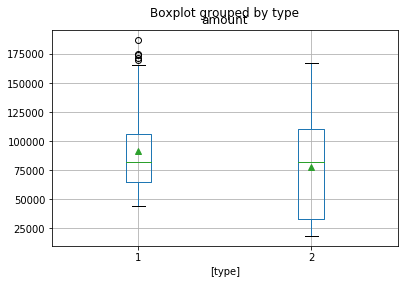

In [6]:
#타입별 사용금액 상자그림
sb_df.iloc[:, [1, 3]].boxplot(by='type', showmeans=True)

In [7]:
#타입별 평균
sb_df.amount.groupby(sb_df.type).mean()

type
1    91852.631579
2    77739.024390
Name: amount, dtype: float64

(0.8952113389968872, 1.2272897947696038e-05)

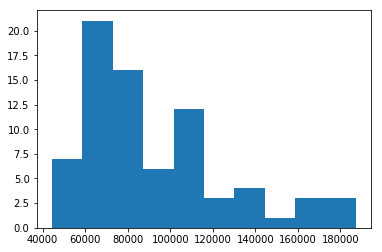

In [10]:
#타입별 금액 추출
data_t1 = sb_df['amount'][sb_df.type == 1] # my_df[my_df.type == 1].ix[:, ['type','amount']]
plt.figure(1)
plt.hist(data_t1, bins=10)
stats.skew(data_t1)
stats.shapiro(data_t1)

(0.91924649477005, 0.006454612594097853)

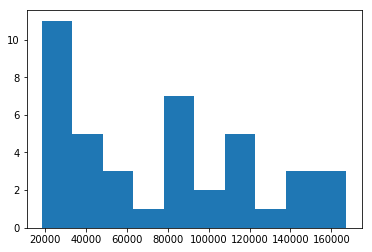

In [11]:
plt.figure(2)
data_t2 = sb_df['amount'][sb_df.type == 2]
plt.hist(data_t2, bins=10)
stats.skew(data_t2)
stats.shapiro(data_t2)

(0.9679037928581238, 0.05114143341779709)

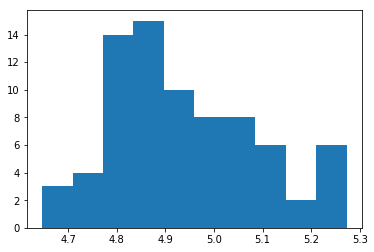

In [15]:
data_t2_ln = [math.log(x,10) for x in data_t1]
plt.figure(3)
plt.hist(data_t2_ln, bins=10)
stats.skew(data_t2_ln)
stats.shapiro(data_t2_ln)

(0.9199904203414917, 0.006817109417170286)

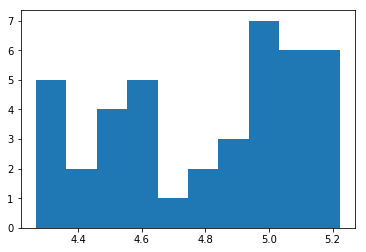

In [16]:
data_t2_ln = [math.log(x,10) for x in data_t2]
plt.figure(4)
plt.hist(data_t2_ln, bins=10)
stats.skew(data_t2_ln)
stats.shapiro(data_t2_ln)

In [18]:
#쿠폰유형 변수 빈도분석
sb_df.type.value_counts(normalize=False, sort=False)

1    76
2    41
Name: type, dtype: int64

In [17]:
sb_df.type.value_counts(normalize=True, sort=False)

1    0.649573
2    0.350427
Name: type, dtype: float64

In [18]:
#레이블 선언
type_lables = {1: 'discount', 2: 'mileage'}

In [19]:
#분산의 동질성 검정
result1 = stats.levene(data_t1, data_t2)
print(result1)

LeveneResult(statistic=8.957483313563461, pvalue=0.0033828126506450285)


In [19]:
#두모집단 평균차이 검정
result2 = stats.ttest_ind(data_t1, data_t2, equal_var = False )
print(result2)

Ttest_indResult(statistic=1.722890150619176, pvalue=0.08973818521404456)


## end of documents